# Spotify Data Analysis

# Import essential libraries:
- `pandas` for data manipulation and analysis.
- `numpy` for numerical operations.
- `matplotlib.pyplot` and `seaborn` for data visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Spotify dataset into a DataFrame using Pandas:
- Provide the file path to the CSV containing track data.
- Ensure the data is accessible in the specified path.

In [62]:
df_tracks = pd.read_csv(r'C:\Users\dhawa\OneDrive\Desktop\project\spotify data Analysis\tracks.csv')

# Explore the dataset:
- Display the first few rows of the dataset to get an initial look at the data.
- Summarize the dataset structure, including column names and data types.
- Generate descriptive statistics for numerical columns to understand data distribution.

In [3]:
# View the first few rows of the dataset
print(df_tracks.head())

# Get a summary of the dataset
print(df_tracks.info())

# Get basic statistics for numerical columns
print(df_tracks.describe())

                       id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  key  loudness  mode  speechine

# Perform data cleaning operations:
- Identify and handle missing values:
  - Drop rows where the 'name' column is missing, as song names are critical.
- Convert the 'release_date' column to datetime format, handling errors.
- Remove duplicate entries based on the unique 'id' column.
- Ensure valid data ranges for specific columns:
  - Cap 'popularity' values between 0 and 100.
  - Clip audio feature columns (e.g., 'danceability', 'energy') between 0 and 1.
- Standardize column names by removing extra spaces and converting to lowercase.

In [6]:
# Step 1: Handle Missing Values
# Check for missing values in each column
missing_values = df_tracks.isnull().sum()

# Drop rows where the 'name' column is missing (assuming song names are critical)
data_cleaned = df_tracks.dropna(subset=['name'])

# Step 2: Format 'release_date' to datetime
# Convert the 'release_date' column to datetime, handling errors for incomplete dates
data_cleaned['release_date'] = pd.to_datetime(data_cleaned['release_date'], errors='coerce', format='%Y-%m-%d')

# Step 3: Check for and remove duplicates based on 'id'
data_cleaned = data_cleaned.drop_duplicates(subset=['id'])

# Step 4: Ensure valid data ranges
# Cap 'popularity' between 0 and 100
data_cleaned['popularity'] = data_cleaned['popularity'].clip(0, 100)

# Cap numeric columns (e.g., danceability, energy) between 0 and 1 where applicable
columns_to_clip = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
for column in columns_to_clip:
    data_cleaned[column] = data_cleaned[column].clip(0, 1)

# Step 5: Standardize Columns (e.g., remove trailing spaces)
data_cleaned.columns = [col.strip().lower() for col in data_cleaned.columns]


C:\Users\dhawa\AppData\Local\Temp\ipykernel_11244\567371268.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['release_date'] = pd.to_datetime(data_cleaned['release_date'], errors='coerce', format='%Y-%m-%d')


# Explore the dataset:
- Display the first few rows of the dataset to get an initial look at the data.
- Summarize the dataset structure, including column names and data types.
- Generate descriptive statistics for numerical columns to understand data distribution.

In [7]:
# View the first few rows of the dataset
print(data_cleaned.head())

# Get a summary of the dataset
print(data_cleaned.info())

# Get basic statistics for numerical columns
print(data_cleaned.describe())

                       id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  key  loudness  mode  speechine

# Validate the cleaned data:
- Display the first few rows of the cleaned dataset.
- Summarize the dataset's updated structure, including column data types and missing values.
- Generate descriptive statistics for numerical columns in the cleaned data.

In [8]:
data_cleaned.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
popularity,586601.0,27.573212,0.0,13.0,27.0,41.0,100.0,18.369417
duration_ms,586601.0,230054.852626,3344.0,175083.0,214907.0,263867.0,5621218.0,126532.824981
explicit,586601.0,0.044091,0.0,0.0,0.0,0.0,1.0,0.205298
release_date,448010,1993-03-23 09:16:40.761590016,1900-01-01 00:00:00,1980-01-01 00:00:00,1997-01-01 00:00:00,2011-01-01 00:00:00,2021-04-16 00:00:00,NaN
danceability,586601.0,0.563612,0.0,0.453,0.577,0.686,0.991,0.166101
energy,586601.0,0.542071,0.0,0.343,0.549,0.748,1.0,0.25191
key,586601.0,5.221594,0.0,2.0,5.0,8.0,11.0,3.51942
loudness,586601.0,-10.205789,-60.0,-12.891,-9.242,-6.481,5.376,5.089422
mode,586601.0,0.658797,0.0,0.0,1.0,1.0,1.0,0.474114
speechiness,586601.0,0.10487,0.0,0.034,0.0443,0.0763,0.971,0.179902


# Find and display the top 10 most popular tracks:
 - Filter the dataset for tracks with a popularity score greater than 90.
 - Sort the filtered tracks in descending order by popularity.
 - Retrieve and display the top 10 most popular tracks.

In [11]:
most_popular = data_cleaned.query('popularity>90', inplace=False).sort_values('popularity', ascending=False)
most_popular[:10]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
91866,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],2019-11-07,0.749,0.463,11,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4
93806,7Bk0uXKk1uPT0XuQbpFzvs,Fiel,94,261667,0,"['Los Legendarios', 'Wisin', 'Jhay Cortez']","['0n6sKrG0xKAf8xmdqeNGke', '3E6xrwgnVfYCrCs0eP...",2021-02-04,0.849,0.701,6,-4.407,0,0.0600,0.40700,0.000000,0.1120,0.505,98.005,4


# Generate a correlation heatmap to analyze relationships between numerical variables:
 - Select relevant numerical columns for correlation analysis.
 - Calculate the pairwise Pearson correlation coefficients.
 - Visualize the correlation matrix using a heatmap with:
   - Annotated correlation values.
   - A color scale centered at zero, ranging from -1 to 1.
 - Add a title and rotate x-axis labels for better readability.


In [33]:
corr_df = data_cleaned[['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 
                        'acousticness', 'instrumentalness', 'liveness', 'valence', 
                        'tempo', 'duration_ms']]


In [34]:
corr_df=corr_df.corr(method='pearson')

[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'energy'),
 Text(3.5, 0, 'loudness'),
 Text(4.5, 0, 'speechiness'),
 Text(5.5, 0, 'acousticness'),
 Text(6.5, 0, 'instrumentalness'),
 Text(7.5, 0, 'liveness'),
 Text(8.5, 0, 'valence'),
 Text(9.5, 0, 'tempo'),
 Text(10.5, 0, 'duration_ms')]

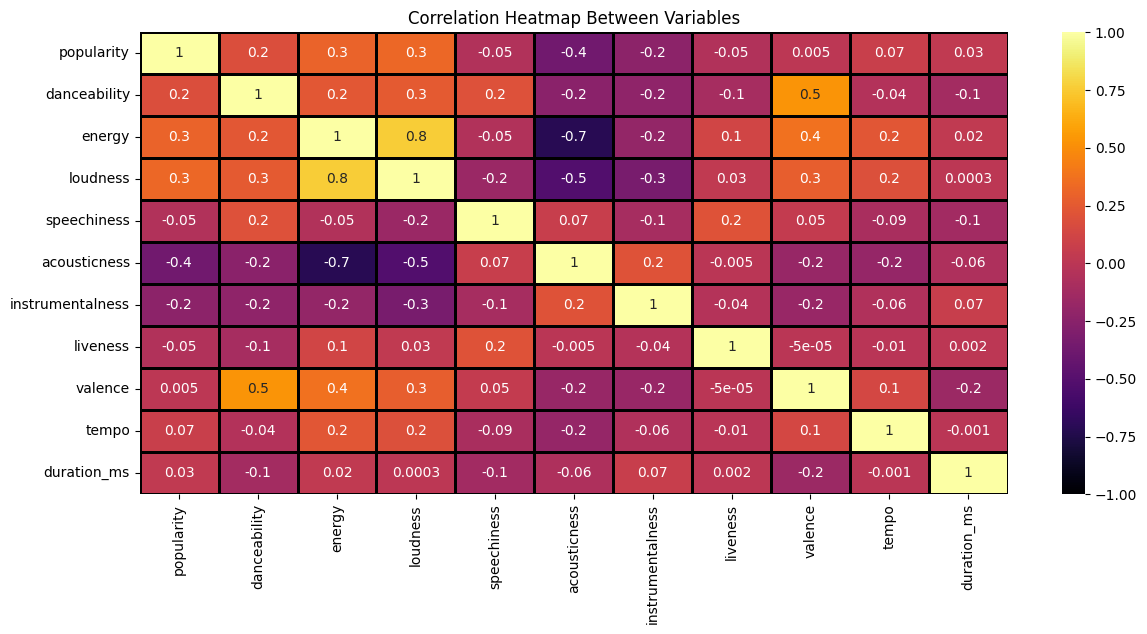

In [35]:
plt.figure(figsize=(14, 6))
heatmap = sns.heatmap(corr_df, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor='Black')
heatmap.set_title("Correlation Heatmap Between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)


# Extract a random sample of 1,000 rows from the cleaned dataset:
 - Use `n=1000` to specify the number of rows to sample.
 - Set `random_state=42` for reproducibility of the random sampling process.
 - Useful for working with a smaller dataset for analysis or visualization.


In [36]:
sample_data = data_cleaned.sample(n=1000, random_state=42)  # 5,000 rows


# Visualize the correlation between loudness and energy using a scatter plot with a regression line:
 - Plot loudness on the y-axis and energy on the x-axis.
 - Use a cyan-colored scatter plot with a regression line to highlight the trend.
 - Add a title to describe the relationship being visualized.
 - Analyze whether a strong linear relationship exists between the two variables.


[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

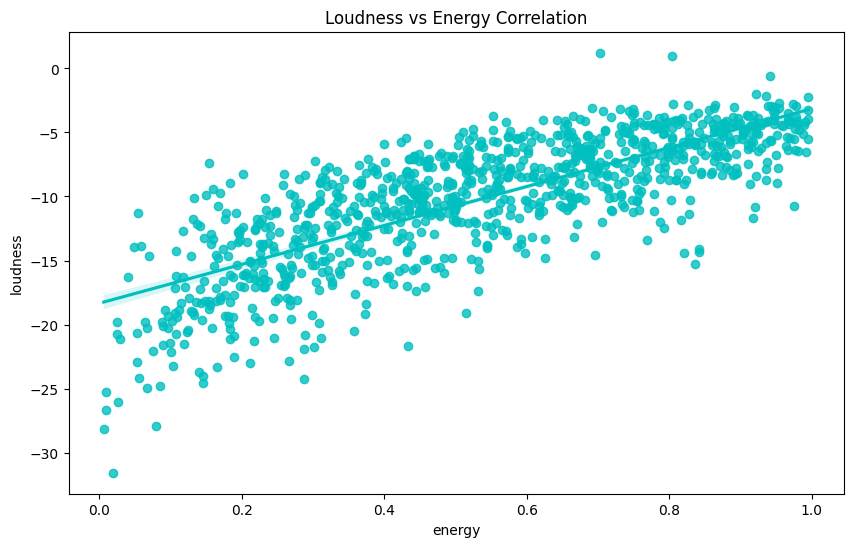

In [37]:
plt.figure(figsize=(10, 6))
sns.regplot(data=sample_data, y="loudness", x="energy", color='c').set(title="Loudness vs Energy Correlation")


# Visualize the correlation between popularity and acousticness using a scatter plot with a regression line:
 - Plot popularity on the y-axis and acousticness on the x-axis.
 - Use a blue-colored scatter plot with a regression line to highlight the trend.
 - Add a title to describe the relationship being visualized.
 - Analyze whether acousticness has an influence on a track's popularity.


[Text(0.5, 1.0, 'Popularity vs acousticness Correlation')]

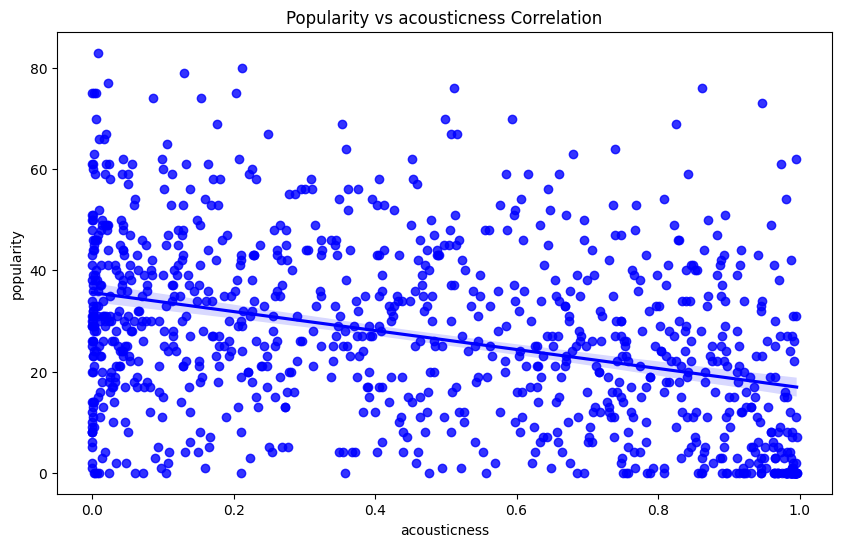

In [38]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample_data,y='popularity',x='acousticness',color='b').set(title='Popularity vs acousticness Correlation')

# Create a pair plot to visualize pairwise relationships and distributions of selected numerical variables:
 - Include variables such as popularity, danceability, energy, loudness, and more.
 - Scatter plots show the relationships between each pair of variables.
 - Diagonal plots represent the distribution of each variable.
 - Useful for exploring trends, correlations, and patterns in the dataset.

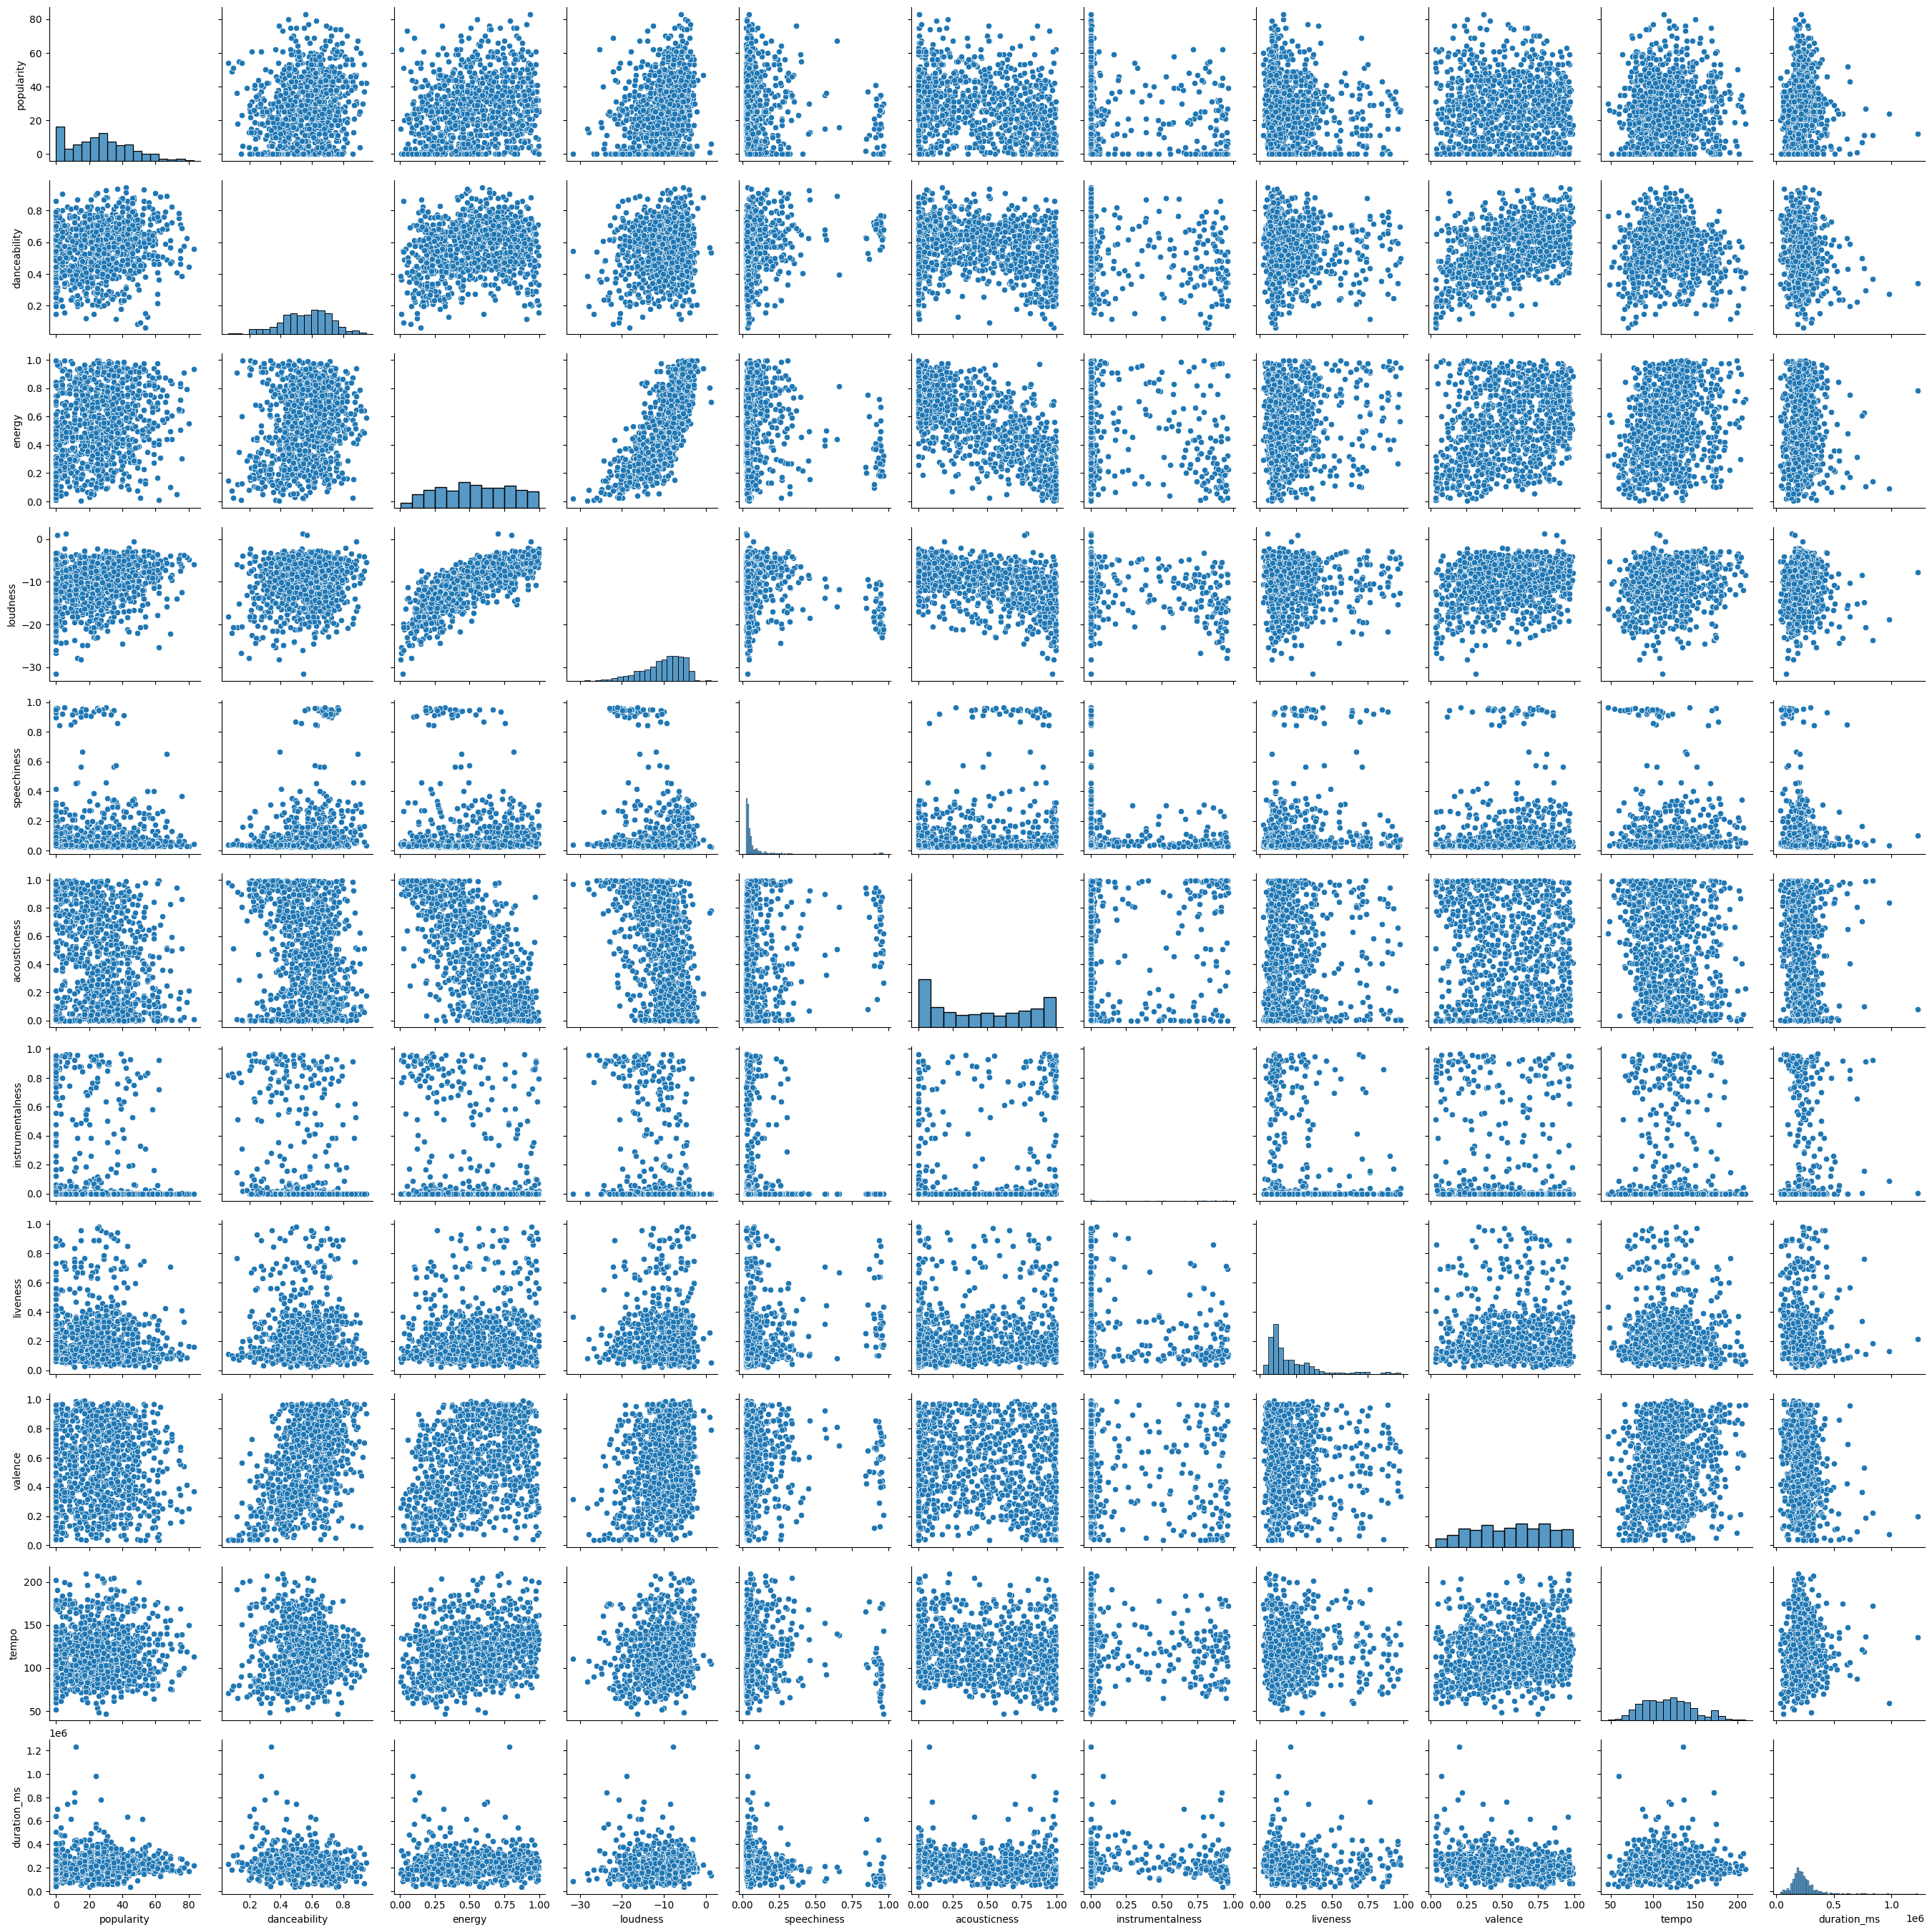

In [39]:
sns.pairplot(sample_data[['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 
                        'acousticness', 'instrumentalness', 'liveness', 'valence', 
                        'tempo', 'duration_ms']])
plt.show()

# Analyze and visualize the distribution of songs per year based on their release dates:
 - Convert the `release_date` column to datetime, handling mixed formats and invalid entries.
 - Extract the year from valid release dates and filter out invalid entries (NaN values).
 - Plot a histogram showing the number of songs released each year:
   - Treat years as discrete values for clarity.
   - Customize the plot's aspect ratio and height for better readability.
 - Add a descriptive title to the visualization.


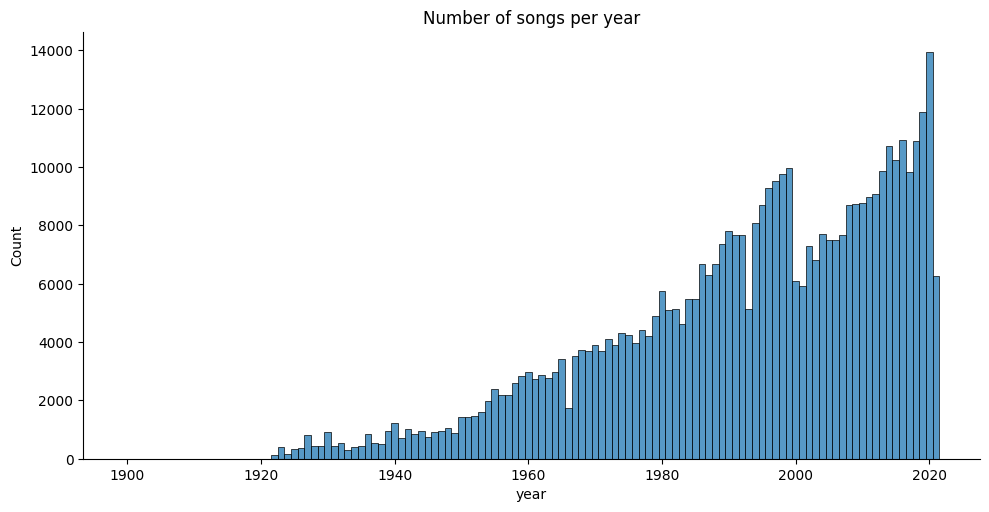

In [44]:
# Convert release_date to datetime, handling mixed formats and errors
df_tracks['dates'] = pd.to_datetime(df_tracks['release_date'], format='%Y-%m-%d', errors='coerce')

# Extract the year from the dates column, skipping invalid dates
df_tracks['year'] = df_tracks['dates'].dt.year

# Filter out rows where the year is NaN (invalid release dates)
valid_years = df_tracks['year'].dropna()


sns.displot(valid_years, discrete=True, aspect=2, height=5, kind="hist").set(title="Number of songs per year")
plt.show()


# Analyze and visualize the average song duration per year:
 - Convert the `release_date` column to datetime, handling mixed formats and errors.
 - Extract the year from valid release dates, skipping invalid dates.
 - Remove rows with missing values in the 'year' or 'duration_ms' columns.
 - Calculate the average song duration per year by grouping the data by 'year' and calculating the mean of 'duration_ms'.
 - Create a bar plot to visualize the average duration per year:
   - Use a rainbow color palette to represent each year.
   - Customize the figure size for better readability.
   - Rotate x-axis labels for improved legibility.
 - Add a title and axis labels to the plot for clarity.


C:\Users\dhawa\AppData\Local\Temp\ipykernel_11244\2449702146.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['year'] = cleaned_data['year'].astype(int)
C:\Users\dhawa\AppData\Local\Temp\ipykernel_11244\2449702146.py:19: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=avg_duration_per_year['year'], y=avg_duration_per_year['duration_ms'],palette=colors,hue=avg_duration_per_year['duration_ms'],legend=False, ax=ax, errorbar=None)


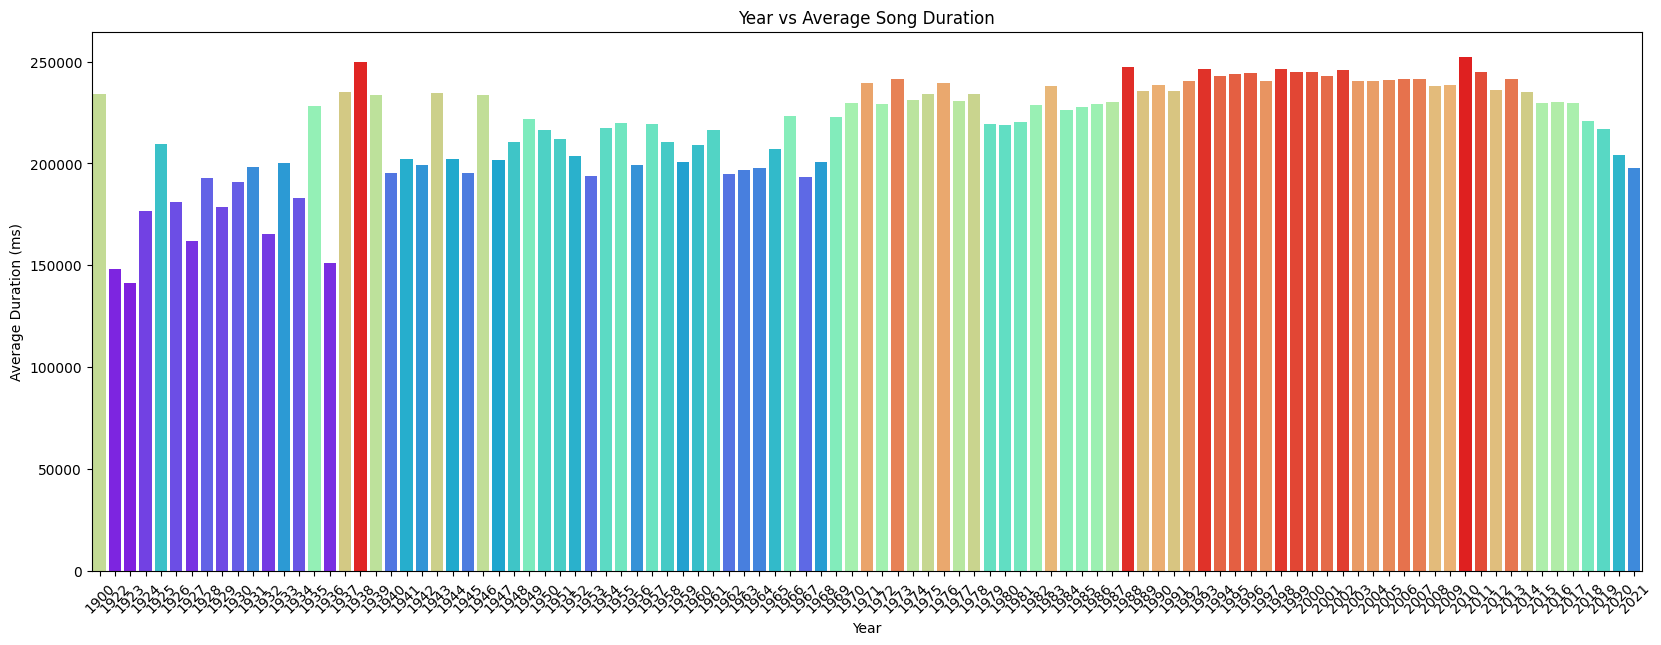

In [ ]:
# Convert release_date to datetime, handling mixed formats and errors
df_tracks['dates'] = pd.to_datetime(df_tracks['release_date'], format='%Y-%m-%d', errors='coerce')

# Extract the year from the dates column, skipping invalid dates
df_tracks['year'] = df_tracks['dates'].dt.year

# Ensure there are no missing values in 'year' and 'duration_ms'
cleaned_data = df_tracks.dropna(subset=['year', 'duration_ms'])
cleaned_data['year'] = cleaned_data['year'].astype(int)
# Group data by year and calculate the mean duration for each year
avg_duration_per_year = cleaned_data.groupby('year')['duration_ms'].mean().reset_index()

# Set figure dimensions
fig_dims = (20, 7)
fig, ax = plt.subplots(figsize=fig_dims)
num_years = len(avg_duration_per_year)
colors = plt.cm.rainbow(np.linspace(0, 1, num_years))
# Create the bar plot
sns.barplot(x=avg_duration_per_year['year'], y=avg_duration_per_year['duration_ms'],palette=colors,hue=avg_duration_per_year['duration_ms'],legend=False, ax=ax, errorbar=None)
ax.set(title="Year vs Average Song Duration", xlabel="Year", ylabel="Average Duration (ms)")

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


# Analyze and visualize the total song duration per year:
 - Group the data by 'year' and calculate the total song duration for each year by summing 'duration_ms'.
 - Create a line plot to visualize the total song duration over the years:
   - Set the plot style to 'whitegrid' for a clean, readable background.
   - Set the figure size to (10, 5) for a compact and clear plot.
 - Add a title to the plot for clarity ("Year vs Duration").


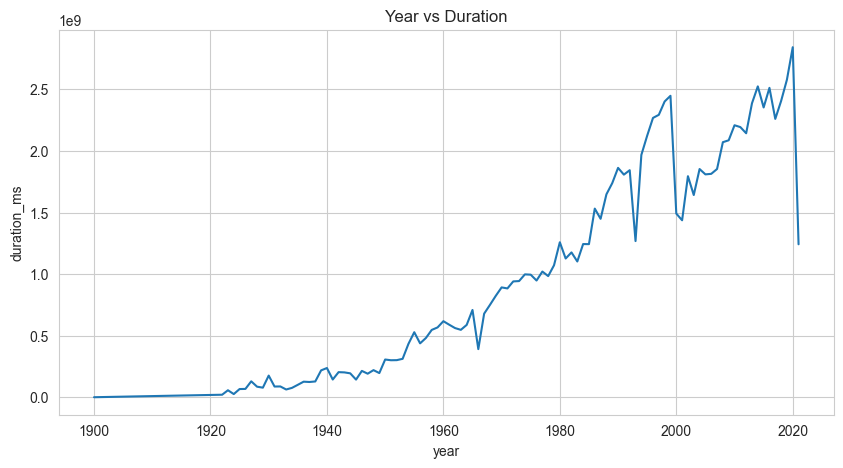

In [69]:
# Group data by year and calculate the mean duration for each year
total_duration_per_year = cleaned_data.groupby('year')['duration_ms'].sum().reset_index()

sns.set_style(style="whitegrid")
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
fig = sns.lineplot(x=total_duration_per_year['year'], y=total_duration_per_year['duration_ms'], ax=ax).set(title="Year vs Duration")

# Load the Spotify dataset:
 - The dataset is loaded into a pandas DataFrame `df_genre` from a CSV file located at `C:\Users\dhawa\OneDrive\Desktop\project\spotify data Analysis\SpotifyFeatures.csv`.


In [70]:
df_genre = pd.read_csv(r'C:\Users\dhawa\OneDrive\Desktop\project\spotify data Analysis\SpotifyFeatures.csv')

# View the first few rows of the dataset:
 - Use the `head()` function to display the first few rows of the `df_genre` DataFrame to get an initial overview of the data.

# Get a summary of the dataset:
 - Use the `info()` function to obtain the dataset's metadata, including column names, data types, and the count of non-null values.

# Get basic statistics for numerical columns:
 - Use the `describe()` function to generate summary statistics (like mean, standard deviation, min, and max values) for the numerical columns in the dataset.


In [71]:
# View the first few rows of the dataset
print(df_genre.head())

# Get a summary of the dataset
print(df_genre.info())

# Get basic statistics for numerical columns
print(df_genre.describe())

   genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#

# Data Cleaning and Preprocessing Steps:

1. **Check for Missing Values:**
   - Identify the count of missing values in each column using `isnull().sum()`.

2. **Drop Duplicate Rows:**
   - Remove any duplicate rows in the dataset using `drop_duplicates()`.

3. **Verify and Standardize Data Types:**
   - Ensure that the specified numerical columns are correctly cast to numeric types using `pd.to_numeric()`, with invalid values coerced to NaN.

4. **Inspect Numerical Columns for Outliers:**
   - Apply the Interquartile Range (IQR) method to detect and filter out extreme outliers:
     - Calculate the first (Q1) and third (Q3) quartiles.
     - Calculate the IQR and filter rows where any numerical column is beyond 1.5 * IQR from Q1 and Q3.

5. **Standardize Categorical Data:**
   - Convert the `mode` column to lowercase for consistency using `str.lower()`.

6. **Summary of Cleaned Dataset:**
   - The summary contains the following information:
     - The count of missing values in each column.
     - The shape of the dataset before and after cleaning.



In [72]:
# Step 1: Check for missing values
missing_values = df_genre.isnull().sum()

# Step 2: Drop duplicate rows if any
spotify_data_cleaned = df_genre.drop_duplicates()

# Step 3: Verify and standardize data types
# For example, ensure numeric columns are of proper types
numeric_columns = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
                   'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
spotify_data_cleaned[numeric_columns] = spotify_data_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Step 4: Inspect numerical columns for outliers (using interquartile range method)
Q1 = spotify_data_cleaned[numeric_columns].quantile(0.25)
Q3 = spotify_data_cleaned[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Filter out rows with extreme outliers
spotify_data_cleaned = spotify_data_cleaned[~((spotify_data_cleaned[numeric_columns] < (Q1 - 1.5 * IQR)) |
                                              (spotify_data_cleaned[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Step 5: Standardize categorical data
# For example, mode can be standardized to lowercase for consistency
spotify_data_cleaned['mode'] = spotify_data_cleaned['mode'].str.lower()

# Check the cleaned dataset summary
cleaned_summary = {
    "Missing Values": missing_values,
    "Shape Before Cleaning": df_genre.shape,
    "Shape After Cleaning": spotify_data_cleaned.shape
}

cleaned_summary


{'Missing Values': genre               0
 artist_name         0
 track_name          1
 track_id            0
 popularity          0
 acousticness        0
 danceability        0
 duration_ms         0
 energy              0
 instrumentalness    0
 key                 0
 liveness            0
 loudness            0
 mode                0
 speechiness         0
 tempo               0
 time_signature      0
 valence             0
 dtype: int64,
 'Shape Before Cleaning': (232725, 18),
 'Shape After Cleaning': (134029, 18)}

# Visualize the average song duration per genre:
1. **Aggregate Data to Find Average Duration per Genre:**
   - Group the data by 'genre' and calculate the average 'duration_ms' for each genre using `groupby()` and `mean()`.

2. **Sort Genres by Average Duration:**
   - Sort the genres by average duration in descending order for better visualization using `sort_values()`.

3. **Plot the Bar Chart:**
   - Create a bar chart with genres on the y-axis and average song duration (in milliseconds) on the x-axis using `sns.barplot()`.
   - Use the "rocket" color palette for the plot.
   - Set the plot title, x-axis label, and y-axis label for better understanding.

4. **Display the Plot:**
   - Adjust the layout to ensure everything fits nicely and display the plot using `plt.show()`.


C:\Users\dhawa\AppData\Local\Temp\ipykernel_11244\639143636.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='genre', x='duration_ms', data=genre_duration, palette="rocket")


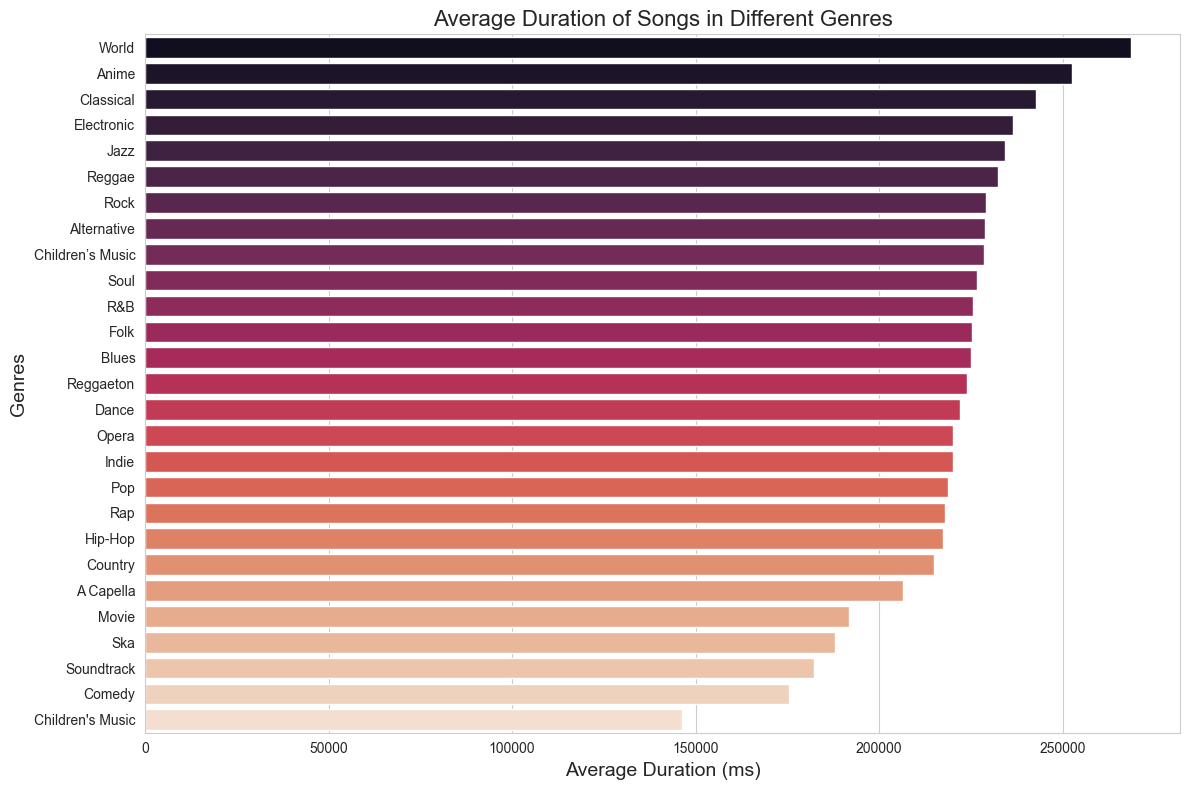

In [76]:
# Aggregate data to find the average duration per genre
genre_duration = spotify_data_cleaned.groupby('genre', as_index=False)['duration_ms'].mean()

# Sort genres by average duration for better visualization
genre_duration = genre_duration.sort_values(by='duration_ms', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='duration_ms', data=genre_duration, palette="rocket")
plt.title("Average Duration of Songs in Different Genres", fontsize=16)
plt.xlabel('Average Duration (ms)', fontsize=14)
plt.ylabel('Genres', fontsize=14)
plt.tight_layout()
plt.show()

# Visualize the top 5 genres by total popularity:
1. **Aggregate Data to Calculate Total Popularity by Genre:**
   - Group the data by 'genre' and calculate the total 'popularity' for each genre using `groupby()` and `sum()`.

2. **Sort Genres by Total Popularity and Select the Top 5:**
   - Sort the genres by total popularity in descending order and select the top 5 genres using `sort_values()` and `head(5)`.

3. **Plot the Bar Chart:**
   - Create a bar chart with genres on the y-axis and total popularity on the x-axis using `sns.barplot()`.
   - Apply the "viridis" color palette for the plot.
   - Set the plot title, x-axis label, and y-axis label for better understanding.

4. **Display the Plot:**
   - Adjust the layout to ensure everything fits properly and display the plot using `plt.show()`.


C:\Users\dhawa\AppData\Local\Temp\ipykernel_11244\2228072927.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='genre', x='popularity', data=top_genres, palette="viridis").set(


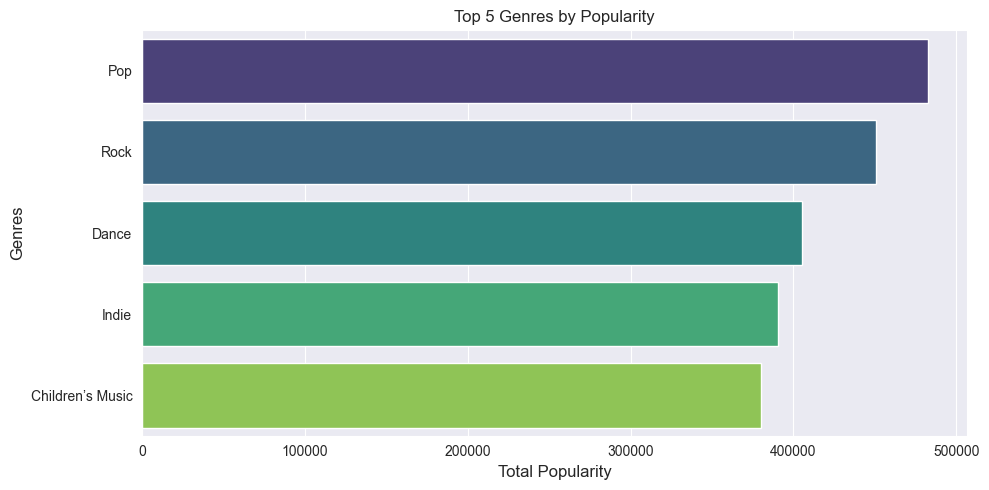

In [77]:
# Aggregate data to calculate total popularity by genre
genre_popularity = spotify_data_cleaned.groupby('genre', as_index=False)['popularity'].sum()

# Sort genres by total popularity and select the top 5
top_genres = genre_popularity.sort_values('popularity', ascending=False).head(5)

# Plot the bar chart
sns.set_style(style="darkgrid")
plt.figure(figsize=(10, 5))
sns.barplot(y='genre', x='popularity', data=top_genres, palette="viridis").set(
    title="Top 5 Genres by Popularity"
)
plt.xlabel('Total Popularity', fontsize=12)
plt.ylabel('Genres', fontsize=12)
plt.tight_layout()
plt.show()